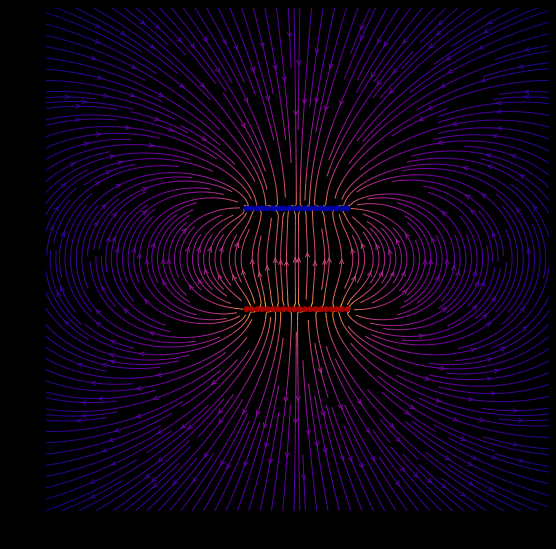

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

WIDTH, HEIGHT, DPI = 700, 700, 100

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = ((x-r0[0])**2 + (y-r0[1])**2)**1.5
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 128, 128
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
X, Y = np.meshgrid(x, y)

# Create a capacitor, represented by two rows of nq opposite charges separated
# by distance d. If d is very small (e.g. 0.1), this looks like a polarized
# disc.
nq, d = 20, 2
charges = []
for i in range(nq):
    charges.append((1, (i/(nq-1)*2-1, -d/2)))
    charges.append((-1, (i/(nq-1)*2-1, d/2)))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure(figsize=(WIDTH/DPI, HEIGHT/DPI), facecolor='k')
ax = fig.add_subplot(facecolor='k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.plasma,
              density=3, arrowstyle='->')

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0], zorder=10))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')
plt.savefig('capacitor.png', dpi=DPI)
plt.show()